In [2]:
import bnoutils as bno
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = bno.BNOData('../Data/002_LineMotion.CSV', sd = 10)

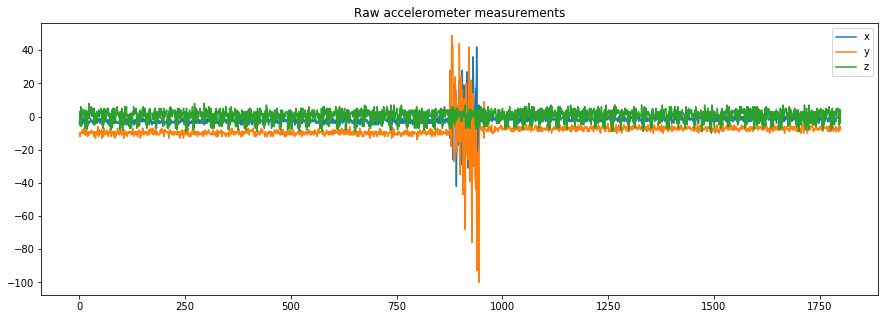

In [4]:
plt.figure(figsize = (15, 5))
plt.plot(data.raw_acceleration[:, ]);
plt.legend(['x', 'y', 'z']);
plt.title('Raw accelerometer measurements');

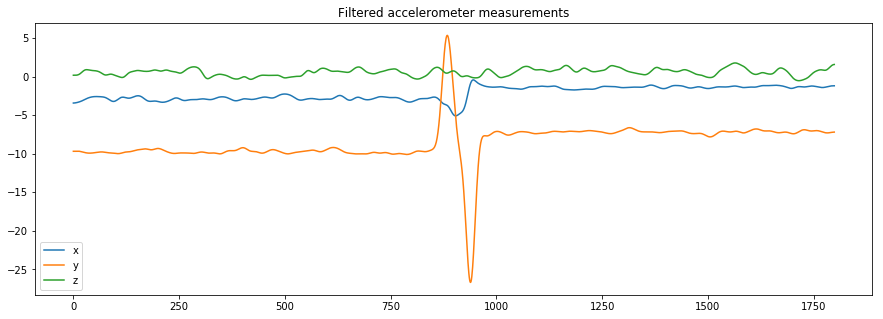

In [5]:
plt.figure(figsize = (15, 5))
plt.plot(data.local_acceleration[:, ]);
plt.legend(['x', 'y', 'z']);
plt.title('Filtered accelerometer measurements');

In [6]:
data.local_acceleration_bias = bno.kalman_filter(data.local_acceleration, noise_sd = 1, p_sd = 0.005)

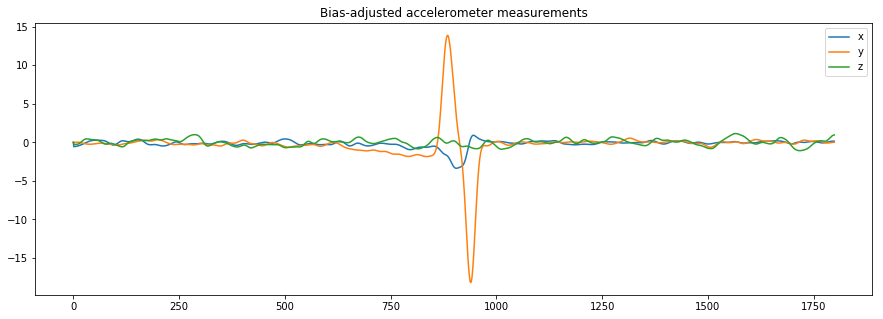

In [7]:
plt.figure(figsize = (15, 5))
plt.plot(data.local_acceleration[:, ] - data.local_acceleration_bias);
plt.legend(['x', 'y', 'z']);
plt.title('Bias-adjusted accelerometer measurements');

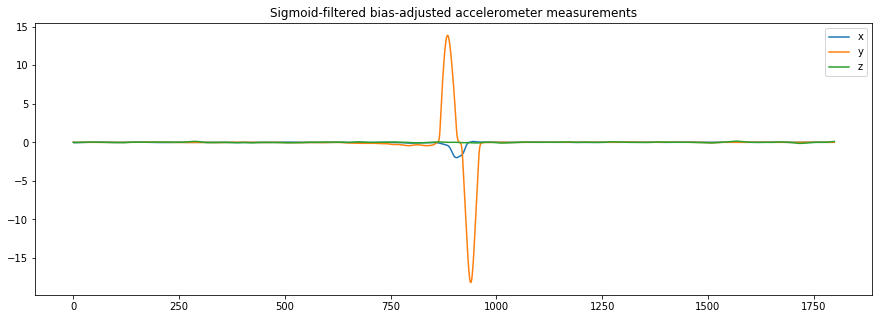

In [21]:
def sigmoid_filter(signal, beta = 1, alpha = 0):
    return 1/(1 + np.exp(-beta*(signal + alpha)))

BETA  = 1
ALPHA = -3
y = data.local_acceleration - data.local_acceleration_bias

plt.figure(figsize = (15, 5))
plt.plot(y * sigmoid_filter(np.abs(y), BETA, ALPHA));
plt.legend(['x', 'y', 'z']);
plt.title('Sigmoid-filtered bias-adjusted accelerometer measurements');

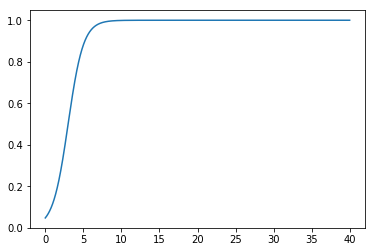

In [31]:
x = np.arange(0, 40, 0.01)
plt.plot(x, sigmoid_filter(x, BETA, ALPHA));

In [32]:
data.local_acceleration = y * sigmoid_filter(np.abs(y), BETA, ALPHA)
data.update_global_acceleration()
data.update_global_velocity()

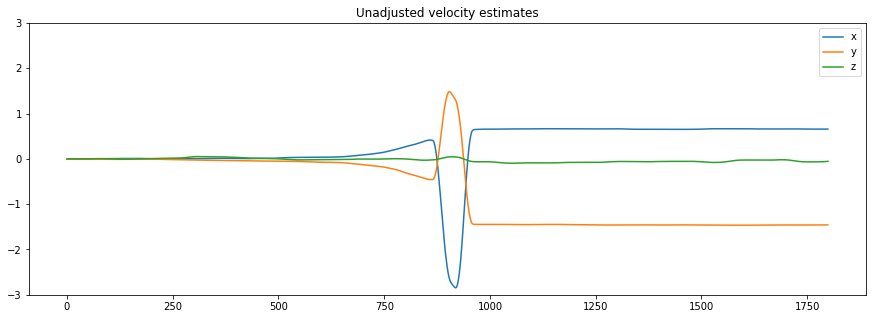

In [33]:
plt.figure(figsize = (15, 5))
plt.plot(data.global_velocity);
plt.legend(['x', 'y', 'z']);
plt.ylim(-3, 3);
plt.title('Unadjusted velocity estimates');

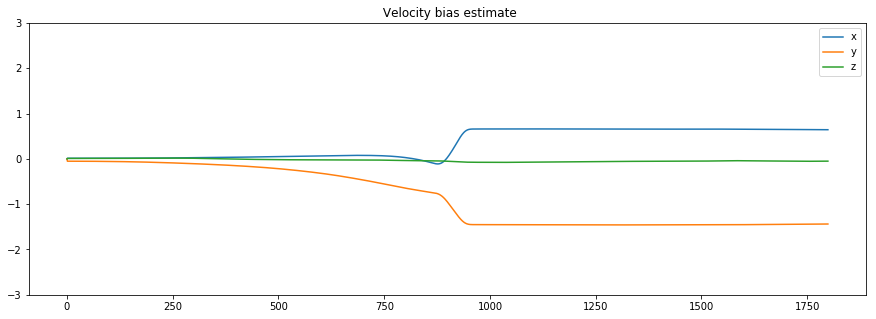

In [41]:
data.global_velocity_bias = bno.kalman_filter(data.global_velocity, noise_sd = 1, p_sd = 0.005)
plt.figure(figsize = (15, 5))
plt.plot(data.global_velocity_bias);
plt.legend(['x', 'y', 'z']);
plt.ylim(-3, 3);
plt.title(' Velocity bias estimate');

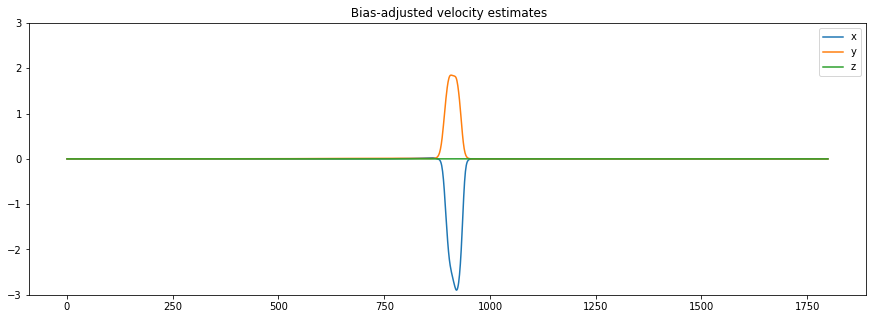

In [77]:
z = data.global_velocity - data.global_velocity_bias
z = sigmoid_filter(abs(z), beta = 2, alpha = -2)*z

plt.figure(figsize = (15, 5))
plt.plot(z);
plt.legend(['x', 'y', 'z']);
plt.ylim(-3, 3)
plt.title(' Bias-adjusted velocity estimates');

In [81]:
data.global_velocity = z
data.update_global_position()

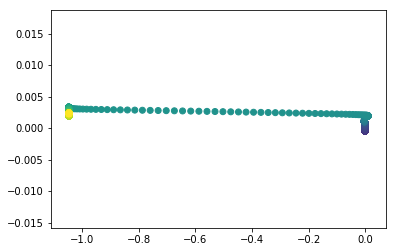

In [88]:
plt.scatter(data.global_position[:, 0], data.global_position[:, 2],
            color = plt.cm.viridis(np.linspace(0, 1, data.global_position.shape[0])));